In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('input/data_wness.csv', index_col='index')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951997 entries, 0 to 951996
Data columns (total 27 columns):
Run_Number           951997 non-null int64
Evt_Number           951997 non-null int64
triggerbit           951997 non-null int64
Evt_bbcZ             951997 non-null float64
clockcross           951997 non-null int64
Wness                949176 non-null float64
charge               951997 non-null float64
pT                   951997 non-null float64
pz                   951997 non-null float64
phi                  951997 non-null float64
eta                  951997 non-null float64
DG0                  951997 non-null float64
DDG0                 951997 non-null float64
DG4                  951997 non-null float64
chi2                 951997 non-null float64
DCA_z                951997 non-null float64
DCA_r                951997 non-null float64
dphi23               951997 non-null float64
dw23                 951997 non-null float64
Rpc1dca              951997 non-null float

In [3]:
print len(df)
print len(df[(df['pz'] < 0) & (df['charge'] == -1)])

951997
183002


In [4]:
df['charge'] = (df['charge'] > 0).apply(int)
df['arm'] = (df['pz'] > 0).apply(int)
df.head()

,Run_Number,Evt_Number,triggerbit,Evt_bbcZ,clockcross,Wness,charge,pT,pz,phi,...,dw23,Rpc1dca,Rpc3dca,fvtx_dphi,fvtx_dr,fvtx_dtheta,fvtx_dr_dtheta,fvtx_cone,rpc_awayclusters3,arm
index,,,,,,,,,,,,,,,,,,,,,
0,386773,2750910,2097152,-41.119637,3,0.000000,0,16.204479,42.891438,-1.434489,...,-0.022373,0.205724,30.410648,100.000000,-100.000000,-100.000000,10000.000000,6,0,1
1,386773,5732025,2097152,-33.974529,4,0.000000,0,58.412083,131.639618,3.001358,...,0.020225,0.055034,998.000000,100.000000,-100.000000,-100.000000,10000.000000,1,0,1
2,386775,543929,2097152,-18.632442,55,0.000000,0,17.766876,43.292278,-1.401690,...,-0.043223,1.122876,998.000000,100.000000,-100.000000,-100.000000,10000.000000,0,0,1
3,386775,805021,2097152,-58.694466,4,0.000000,0,17.077560,-24.988157,-2.925440,...,-0.004160,0.317762,998.000000,100.000000,-100.000000,-100.000000,10000.000000,0,0,0
4,386776,1107210,524288,5.341682,78,0.000718,0,19.280571,43.644257,2.211607,...,0.035007,998.000000,3.322567,0.056375,4.016472,0.059547,0.239168,11,0,1


In [5]:
grouped = df.groupby(['arm', 'charge'])
dfs = [[None for x in range(2)] for x in range(2)]
print dfs
for g in grouped:
    dfs[g[0][0]][g[0][1]] = g[1]
    
print dfs[0][0].shape

[[None, None], [None, None]]
(183002, 28)


In [6]:
dw23bins = np.linspace(-.3, .3, 60+1)
wnessbins = np.linspace(0, 1, 50+1)
hist = dfs[0][0].groupby([pd.cut(dfs[0][0]['dw23'], dw23bins), pd.cut(dfs[0][0]['Wness'], wnessbins)]).count()
hist['entries'] = hist['Wness']
hist = hist[['entries', 'pz']]
hist.reset_index(inplace=True)
hist.drop('pz', axis=1, inplace = True)
hist.fillna(0, inplace=True)

In [7]:
def convert_range_str(s):
    s = s[1:-1]
    low, up = s.split(', ')
    
    mid = (float(low) + float(up)) / 2
    
    return mid

hist['dw23_bin_center'] = hist['dw23'].apply(convert_range_str)
hist['wness_bin_center'] = hist['Wness'].apply(convert_range_str)
hist.describe()

,entries,dw23_bin_center,wness_bin_center
count,3000.000000,3000.00000,3000.000000
mean,14.020333,0.00000,0.500000
std,79.402461,0.17321,0.288666
min,0.000000,-0.29500,0.010000
25%,0.000000,-0.14750,0.250000
50%,1.000000,0.00000,0.500000
75%,6.000000,0.14750,0.750000
max,1143.000000,0.29500,0.990000


In [8]:
hist = hist[(hist['wness_bin_center'] > .1) & (hist['wness_bin_center'] < .9)]

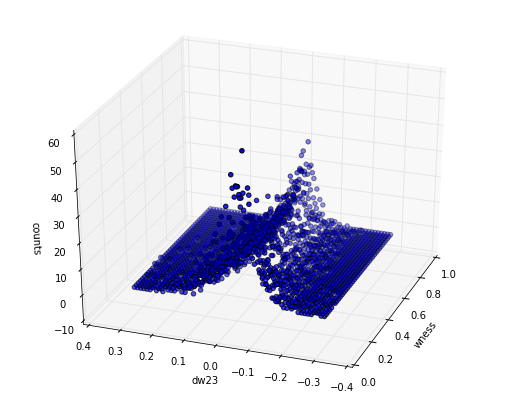

In [9]:
wness = hist['wness_bin_center'].values
dw23 = hist['dw23_bin_center'].values
entries = hist['entries'].values


plt.figure(num=1, figsize=(9, 7)) 
ax = plt.subplot(projection='3d')
ax.scatter(wness, dw23, entries)
ax.view_init(elev=30, azim=-160)
ax.set_xlabel('wness')
ax.set_ylabel('dw23')
ax.set_zlabel('counts')

In [10]:
df2 = hist[(hist['wness_bin_center'] > .1) & (hist['wness_bin_center'] < .3)].groupby('dw23_bin_center').agg(np.sum)['entries']
df4 = hist[(hist['wness_bin_center'] > .3) & (hist['wness_bin_center'] < .5)].groupby('dw23_bin_center').agg(np.sum)['entries']
df6 = hist[(hist['wness_bin_center'] > .5) & (hist['wness_bin_center'] < .7)].groupby('dw23_bin_center').agg(np.sum)['entries']
df8 = hist[(hist['wness_bin_center'] > .7) & (hist['wness_bin_center'] < .9)].groupby('dw23_bin_center').agg(np.sum)['entries']

print df2

dw23_bin_center
-0.295      1
-0.285      0
-0.275      5
-0.265      4
-0.255      1
-0.245      2
-0.235      4
-0.225      3
-0.215      2
-0.205      6
-0.195      6
-0.185      6
-0.175     11
-0.165     12
-0.155     30
-0.145     30
-0.135     30
-0.125     51
-0.115     59
-0.105     69
-0.095    109
-0.085    115
-0.075    130
-0.065    197
-0.055    267
-0.045    265
-0.035    314
-0.025    286
-0.015    264
-0.005    215
 0.005    203
 0.015    188
 0.025    150
 0.035    132
 0.045    112
 0.055     95
 0.065     79
 0.075     50
 0.085     57
 0.095     39
 0.105     29
 0.115     20
 0.125     23
 0.135     12
 0.145     10
 0.155     11
 0.165     12
 0.175      7
 0.185      5
 0.195      9
 0.205      6
 0.215      3
 0.225      0
 0.235      5
 0.245      4
 0.255      0
 0.265      1
 0.275      0
 0.285      2
 0.295      0
Name: entries, dtype: float64


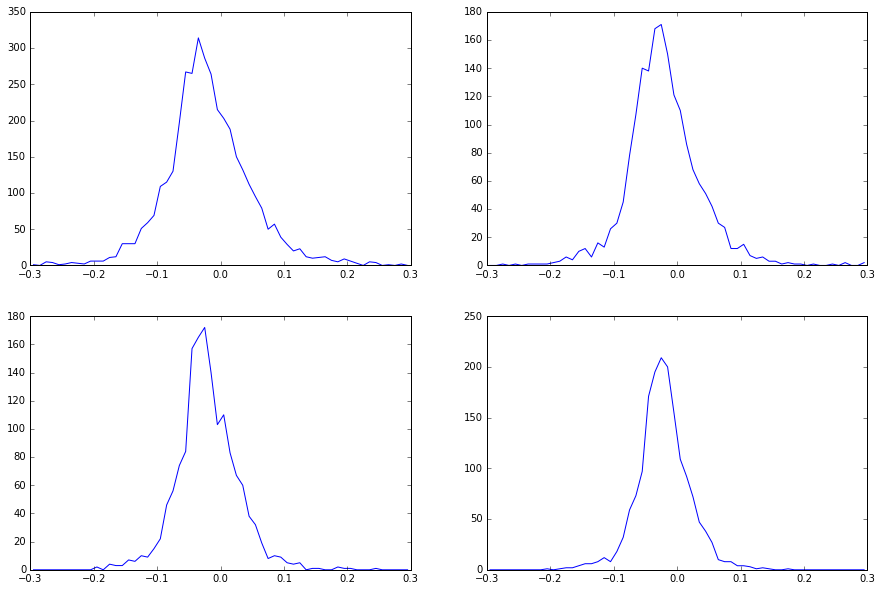

In [11]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
ax[0, 0].plot(df2)
ax[0, 1].plot(df4)
ax[1, 0].plot(df6)
ax[1, 1].plot(df8)


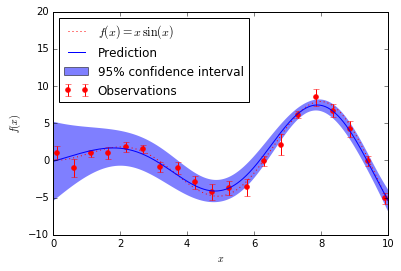

In [12]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as pl

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     nugget=(dy / y) ** 2,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

pl.show()

In [13]:
print 'X', X.shape
print 'x', x.shape
print 'y', y.shape
print 'dy', dy.shape

X (20, 1)
x (1000, 1)
y (20,)
dy (20,)


In [14]:


X = hist[['wness_bin_center', 'dw23_bin_center']].values
y = hist['entries'].values
dy = np.sqrt(y)

nugget = (dy / y) ** 2
inds = np.where(np.isnan(nugget))
nugget[inds] = 1.0


print X.shape, y.shape, dy.shape

n = 20

for i in range(0, len(nugget)/n):
    for j in range(0, n):
        print '%.2f'%nugget[j+i*n],
    print ''

(2400, 2) (2400,) (2400,)
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 0.50 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 0.50 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 

In [16]:
# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='squared_exponential', theta0=[1e-1, 1e-1],
                     thetaL=[1e-5, 1e-5], thetaU=[10, 10],
                     nugget=nugget,
                     random_start=100,
                     verbose=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

Performing Maximum Likelihood Estimation of the autocorrelation parameters...
The chosen optimizer is: fmin_cobyla
100 random starts are required.
5 completed
10 completed
15 completed
20 completed
25 completed
30 completed
35 completed
40 completed
45 completed
50 completed
55 completed
60 completed
65 completed
70 completed
75 completed
80 completed
85 completed
90 completed
95 completed


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x7f96dce508c0>,
        normalize=True, nugget=array([ 1.,  1., ...,  1.,  1.]),
        optimizer='fmin_cobyla', random_start=100,
        random_state=<mtrand.RandomState object at 0x7f970ea183d0>,
        regr=<function constant at 0x7f96dce50500>, storage_mode='full',
        theta0=array([[ 0.1,  0.1]]),
        thetaL=array([[  1.00000e-05,   1.00000e-05]]),
        thetaU=array([[10, 10]]), verbose=True)

In [17]:
print X.shape
x = []
for w in np.arange(.11, .9, .02):
    for d in np.arange(-.29, .31, .005):
        x.append([w, d])
        
        
x = np.array(x)
print x.shape

(2400, 2)
(4800, 2)


In [18]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

In [19]:
dfp = pd.DataFrame({'wness': x[:,0], 'dw23': x[:,1], 'entries': y_pred, 'sigma': sigma})

df2p = dfp[(dfp['wness'] > .1) & (dfp['wness'] < .3)].groupby('dw23').agg(np.sum)['entries']
df4p = dfp[(dfp['wness'] > .3) & (dfp['wness'] < .5)].groupby('dw23').agg(np.sum)['entries']
df6p = dfp[(dfp['wness'] > .5) & (dfp['wness'] < .7)].groupby('dw23').agg(np.sum)['entries']
df8p = dfp[(dfp['wness'] > .7) & (dfp['wness'] < .9)].groupby('dw23').agg(np.sum)['entries']

df2ps = dfp[(dfp['wness'] > .1) & (dfp['wness'] < .3)].groupby('dw23').agg(np.sum)['sigma']
df4ps = dfp[(dfp['wness'] > .3) & (dfp['wness'] < .5)].groupby('dw23').agg(np.sum)['sigma']
df6ps = dfp[(dfp['wness'] > .5) & (dfp['wness'] < .7)].groupby('dw23').agg(np.sum)['sigma']
df8ps = dfp[(dfp['wness'] > .7) & (dfp['wness'] < .9)].groupby('dw23').agg(np.sum)['sigma']

'''
np.concatenate([X, X[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
        '''

"\nnp.concatenate([X, X[::-1]]),\n        np.concatenate([y_pred - 1.9600 * sigma,\n                       (y_pred + 1.9600 * sigma)[::-1]]),\n        alpha=.5, fc='b', ec='None', label='95% confidence interval')\n        "

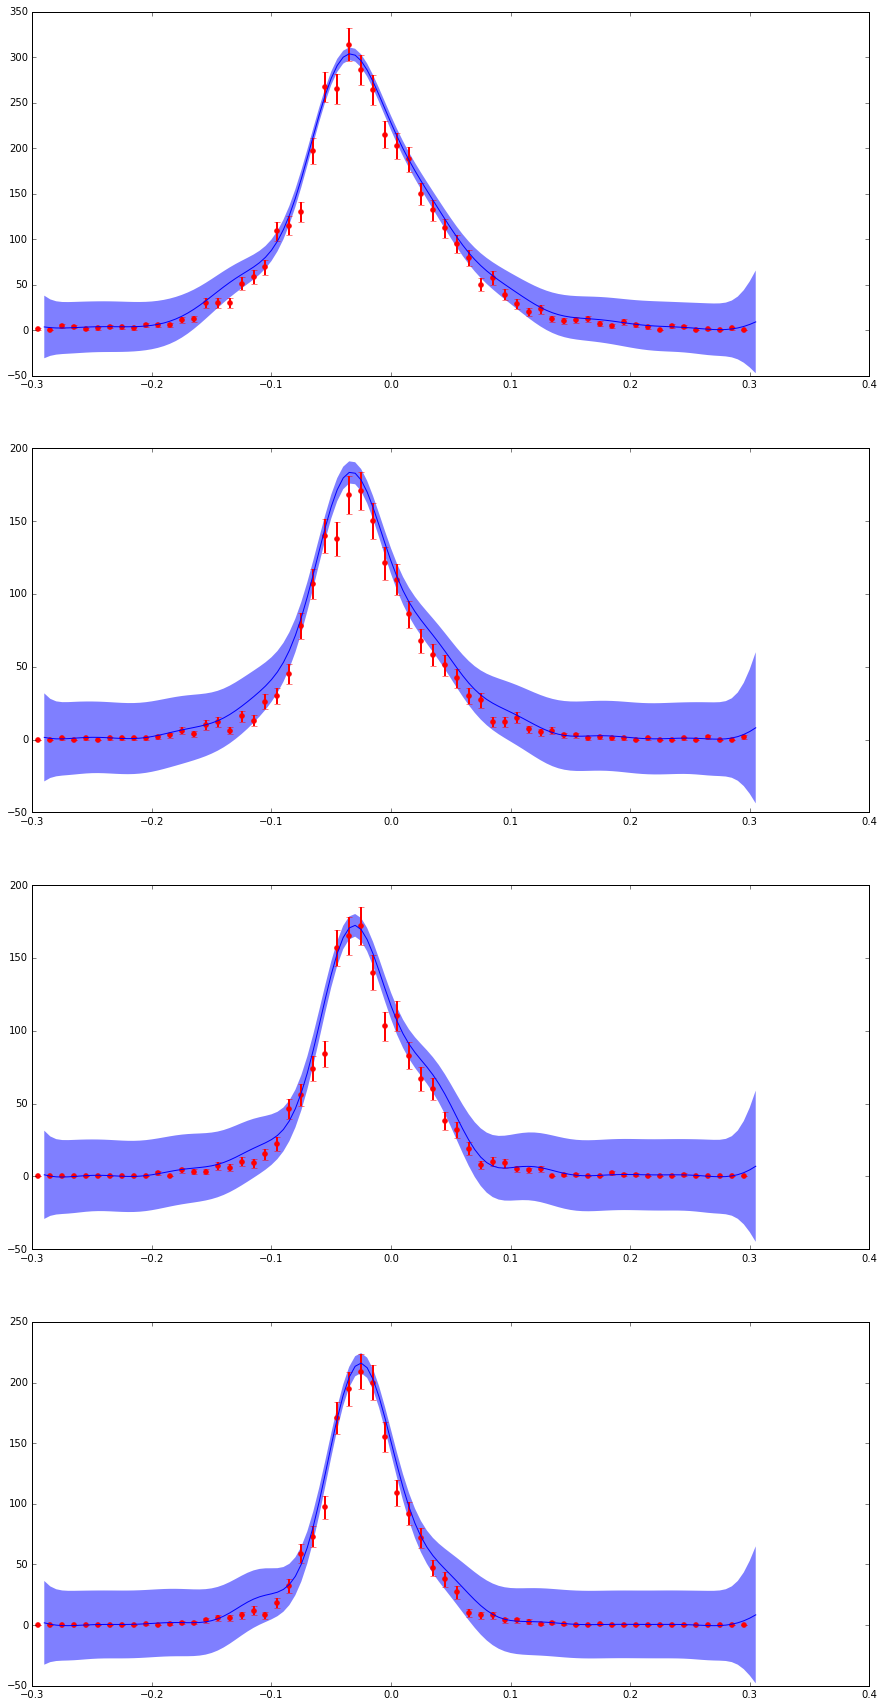

In [20]:
fig, ax = plt.subplots(4)
fig.set_figheight(30)
fig.set_figwidth(15)
ax[0].errorbar(df2.index.values, df2.values, np.sqrt(df2).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[0].plot(df2p)
ax[0].fill(np.concatenate([df2ps.index.values, df2ps.index.values[::-1]]),
              np.concatenate([df2p - 1.9600 * df2ps,
                       (df2p + 1.9600 * df2ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[1].errorbar(df4.index.values, df4.values, np.sqrt(df4).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[1].plot(df4p)
ax[1].fill(np.concatenate([df4ps.index.values, df4ps.index.values[::-1]]),
              np.concatenate([df4p - 1.9600 * df4ps,
                       (df4p + 1.9600 * df4ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[2].errorbar(df6.index.values, df6.values, np.sqrt(df6).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[2].plot(df6p)
ax[2].fill(np.concatenate([df6ps.index.values, df6ps.index.values[::-1]]),
              np.concatenate([df6p - 1.9600 * df6ps,
                       (df6p + 1.9600 * df6ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[3].errorbar(df8.index.values, df8.values, np.sqrt(df8).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[3].plot(df8p)
ax[3].fill(np.concatenate([df8ps.index.values, df8ps.index.values[::-1]]),
              np.concatenate([df8p - 1.9600 * df8ps,
                       (df8p + 1.9600 * df8ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')

In [21]:
x = []
for w in np.arange(.1+.01, 1+.01, .02):
    for d in np.arange(-.3+.0025, .3+.0025, .005):
        x.append([w, d])
x = np.array(x)
y_pred2, MSE2 = gp.predict(x, eval_MSE=True)

sigma2 = np.sqrt(MSE2)

dfp = pd.DataFrame({'wness': x[:,0], 'dw23': x[:,1], 'entries': y_pred2, 'sigma': sigma2})
df9p = dfp[(dfp['wness'] > .9) & (dfp['wness'] < 1)].groupby('dw23').agg(np.sum)['entries']
df9ps = dfp[(dfp['wness'] > .9) & (dfp['wness'] < 1)].groupby('dw23').agg(np.sum)['sigma']

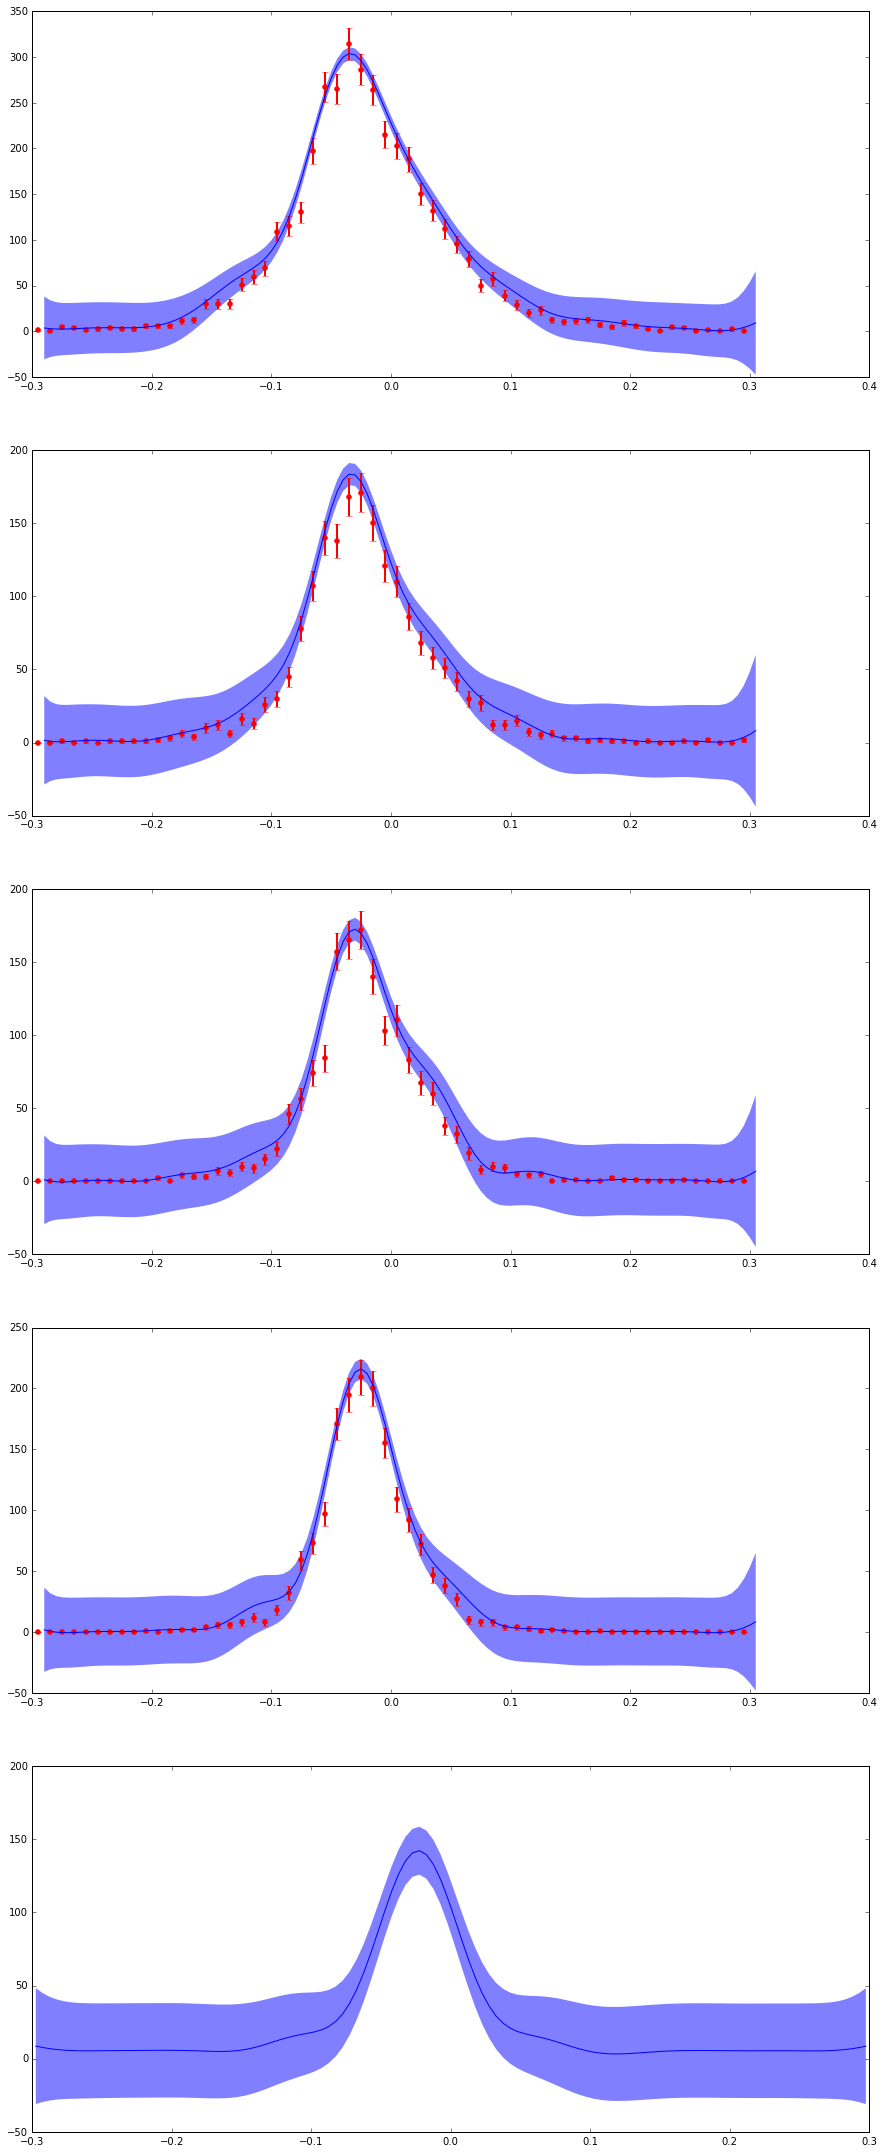

In [22]:
fig, ax = plt.subplots(5)
fig.set_figheight(38)
fig.set_figwidth(15)
ax[0].errorbar(df2.index.values, df2.values, np.sqrt(df2).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[0].plot(df2p)
ax[0].fill(np.concatenate([df2ps.index.values, df2ps.index.values[::-1]]),
              np.concatenate([df2p - 1.9600 * df2ps,
                       (df2p + 1.9600 * df2ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[1].errorbar(df4.index.values, df4.values, np.sqrt(df4).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[1].plot(df4p)
ax[1].fill(np.concatenate([df4ps.index.values, df4ps.index.values[::-1]]),
              np.concatenate([df4p - 1.9600 * df4ps,
                       (df4p + 1.9600 * df4ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[2].errorbar(df6.index.values, df6.values, np.sqrt(df6).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[2].plot(df6p)
ax[2].fill(np.concatenate([df6ps.index.values, df6ps.index.values[::-1]]),
              np.concatenate([df6p - 1.9600 * df6ps,
                       (df6p + 1.9600 * df6ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[3].errorbar(df8.index.values, df8.values, np.sqrt(df8).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[3].plot(df8p)
ax[3].fill(np.concatenate([df8ps.index.values, df8ps.index.values[::-1]]),
              np.concatenate([df8p - 1.9600 * df8ps,
                       (df8p + 1.9600 * df8ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')


ax[4].plot(df9p)
ax[4].fill(np.concatenate([df9ps.index.values, df9ps.index.values[::-1]]),
              np.concatenate([df9p - 1.9600 * df9ps,
                       (df9p + 1.9600 * df9ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')